Linear Regression

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
Offense = pd.read_csv('Offense/clean_offense.csv')
Offense = Offense.dropna(axis='rows')
Offense.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted,Round,Draft_Outcome
16,17,2000,Shyrone Stith,RB,0.0,Virginia Tech,College Stats,67,204,4.60,35.0,13.0,111.0,7.14,4.14,Jacksonville Jaguars,7,drafted
17,18,2000,Dave Stachelski,TE,0.0,Boise State,College Stats,75,250,4.78,38.0,24.0,115.0,6.84,4.14,New England Patriots,5,drafted
19,20,2000,Terrelle Smith,FB,2.0,Arizona State,College Stats,73,249,5.00,32.5,19.0,109.0,8.38,4.85,New Orleans Saints,4,drafted
32,33,2000,Travis Prentice,RB,4.0,Miami (OH),College Stats,73,225,4.50,37.0,23.0,115.0,6.92,4.40,Cleveland Browns,3,drafted
40,41,2000,Sammy Morris,FB,33.0,Texas Tech,College Stats,73,221,4.65,37.5,23.0,117.0,7.05,4.21,Buffalo Bills,5,drafted


In [26]:
X = Offense[["Height", "Wt", "40YD", "Vertical", "BenchReps", "Broad Jump", "3Cone", "Shuttle"]]
y = Offense["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(549, 8) (549, 1)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.10832232814720942
Testing Score: 0.028804927793778076


Text(0.5, 1.0, 'Residual Plot')

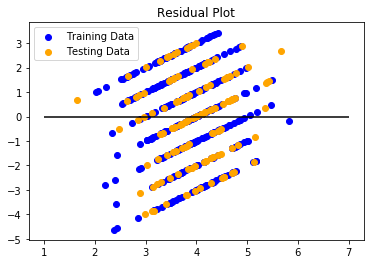

In [30]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Quantifying Regression

In [31]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 3.1948337017642316
R-squared (R2 ): 0.09813725049785049


In [35]:
model.score(X, y)

0.09813725049785049

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
model.score(X_test, y_test)

0.028804927793778076

Logical Regression


In [39]:
XOffense = Offense.drop(columns=["Rk","Year","Player","Pos","AV","School","College","Drafted", "Round", "Draft_Outcome"])

In [40]:
X = XOffense
y = Offense["Round"]
print(X.shape, y.shape)

(549, 8) (549,)


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.24087591240875914
Testing Data Score: 0.1956521739130435


In [45]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [3 3 6 1 3 2 3 2 4 1]
First 10 Actual labels: [5, 2, 5, 3, 5, 2, 3, 5, 3, 6]


In [23]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,8,8
1,8,4
2,8,2
3,8,4
4,8,2
5,8,8
6,8,8
7,8,8
8,8,8
9,8,7
